-------------------------------------------
# Seção 1 - Importando bibliotecas
-------------------------------------------

### Nessa primeira célula, vamos importar as principais bibliotecas para manipulação de dados, visualização e Machine Learning.

In [1]:
import numpy as np               # Para cálculos numéricos e arrays
import pandas as pd              # Para manipulação de dados em tabelas (DataFrames)
import matplotlib.pyplot as plt  # Para gráficos básicos
import seaborn as sns            # Para gráficos mais bonitos
from sklearn import datasets     # Para acessar datasets prontos
from sklearn.model_selection import train_test_split  # Para dividir dados em treino/teste
from sklearn.preprocessing import StandardScaler      # Para padronizar dados
from sklearn.linear_model import LogisticRegression   # Modelo de classificação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

------------------------------------------
# Seção 2 - Carregando e conhecendo dados
-------------------------------------------

&emsp;O dataset Iris é um dos conjuntos de dados mais famosos da ciência de dados e estatística. Ele contém 150 registros de flores de três espécies diferentes de íris: setosa, versicolor e virginica. Para cada flor, são medidas quatro características: comprimento e largura da sépala, comprimento e largura da pétala (todas em centímetros). Esse dataset é amplamente utilizado para demonstração de técnicas de classificação e análise exploratória de dados.

In [2]:
# Exemplo: Dataset Iris (flores)
iris = datasets.load_iris()

# O dataset vem em formato de "bunch" (tipo um dicionário avançado).
# Vamos converter para um DataFrame para trabalhar mais facilmente.

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Ver as primeiras linhas da tabela
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


-------------------------------------------
# Seção 3 - Exploração inicial dos dados (Pandas)
-------------------------------------------


In [3]:
# Ver tamanho do dataset
print("Formato:", df.shape)

# Classes da variável alvo
print("\nValores únicos da variável target (0=setosa, 1=versicolor, 2=virginica):")
print(df['target'].unique())

# Contagem de registros por classe
print("\nContagem por classe:")
print(df['target'].value_counts())

Formato: (150, 5)

Valores únicos da variável target (0=setosa, 1=versicolor, 2=virginica):
[0 1 2]

Contagem por classe:
target
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
# Ver tipos de variáveis e info geral
print("\nInformações do Dataset:")
df.info()


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


-------------------------------------------
# Seção 4 - Queries e filtros no Pandas
-------------------------------------------


In [6]:
# Selecionando uma coluna
df['sepal length (cm)'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [7]:
# Selecionando múltiplas colunas
df[['sepal length (cm)', 'sepal width (cm)']].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
# Filtrando linhas: apenas flores "setosa" (target = 0)
setosa = df[df['target'] == 0]
"\nQtd de setosas:", len(setosa)

('\nQtd de setosas:', 50)

In [9]:
# Ordenando por comprimento da pétala
df_sorted = df.sort_values(by='petal length (cm)', ascending=False)
print("\nTop 5 maiores pétalas da amostra:")
df_sorted.head()


Top 5 maiores pétalas da amostra:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
118,7.7,2.6,6.9,2.3,2
122,7.7,2.8,6.7,2.0,2
117,7.7,3.8,6.7,2.2,2
105,7.6,3.0,6.6,2.1,2
131,7.9,3.8,6.4,2.0,2


-------------------------------------------
# Seção 5 - Visualizações com Matplotlib e Seaborn
-------------------------------------------

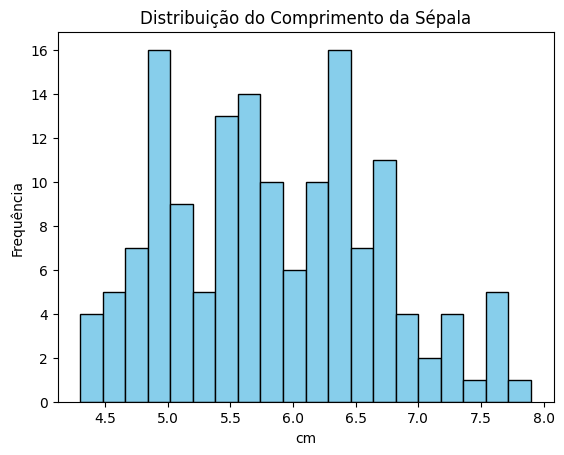

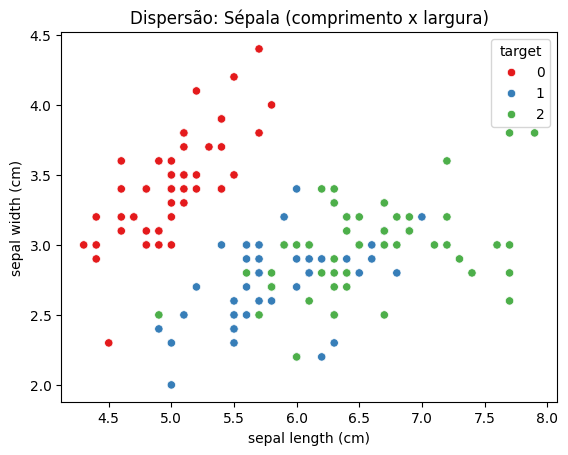

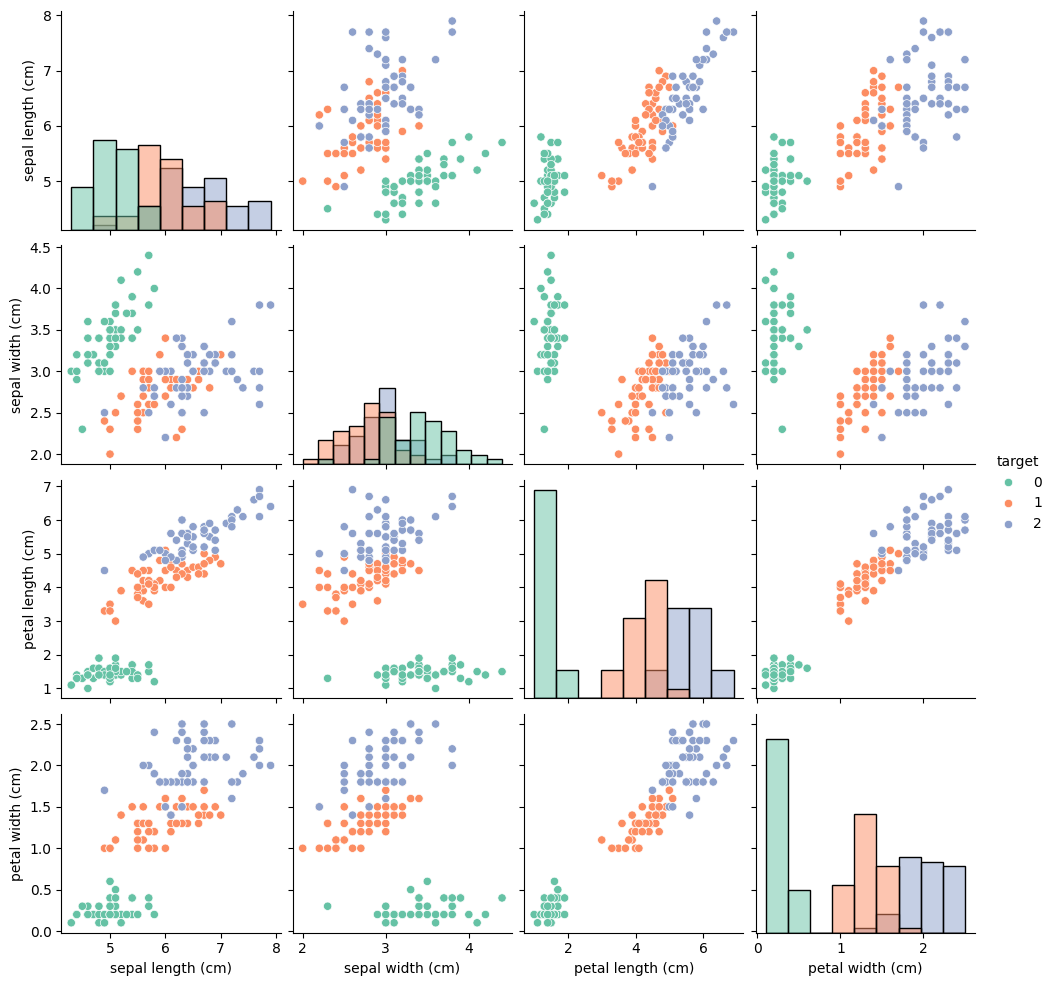

In [10]:

# Histograma simples
plt.hist(df['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição do Comprimento da Sépala")
plt.xlabel("cm")
plt.ylabel("Frequência")
plt.show()

# Scatterplot com Seaborn
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='Set1')
plt.title("Dispersão: Sépala (comprimento x largura)")
plt.show()

# Pairplot para ver relações entre todas as variáveis
sns.pairplot(df, hue='target', diag_kind='hist', palette='Set2')
plt.show()

-------------------------------------------
# Seção 6 - Preparação dos dados para Machine Learning
-------------------------------------------


In [11]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Remover linhas com valores nulos (se houver)
df = df.dropna() ## outros métodos podem ser usados, como média, moda, back fill ou forward fill

# Verificar duplicatas
print("\nQuantidade de linhas duplicadas:", df.duplicated().sum())

# Remover duplicatas (se houver)
df = df.drop_duplicates()

# Exibir novo formato do DataFrame
print("\nFormato após limpeza:", df.shape)

Valores nulos por coluna:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Quantidade de linhas duplicadas: 1

Formato após limpeza: (149, 5)


In [12]:
X = df.drop(columns=['target'])  # variáveis preditoras
y = df['target']                 # variável alvo (classe da flor)

# Divisão em treino e teste (70% treino / 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho treino:", X_train.shape, "| Tamanho teste:", X_test.shape)

# Padronização (média=0, desvio=1) - importante para certos modelos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Tamanho treino: (104, 4) | Tamanho teste: (45, 4)


-------------------------------------------
# Seção 7 - Treinando um modelo (Scikit-Learn)
-------------------------------------------


In [13]:
# Usaremos o modelo de Regressão Logística (simples e eficiente)
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = model.predict(X_test_scaled)

# Avaliando o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0

Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



-------------------------------------------
# Seção 8 - Visualizando resultados do modelo
-------------------------------------------

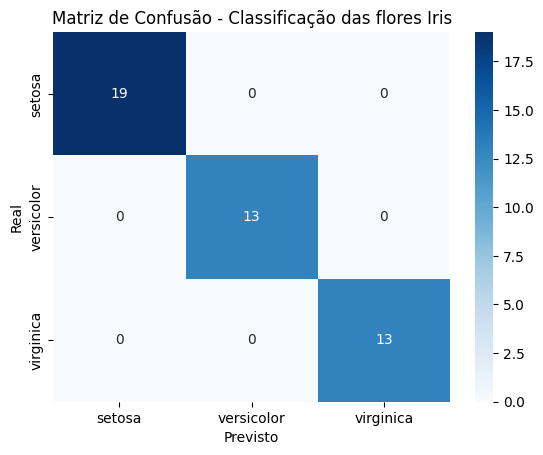

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
# Exemplo gráfico da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Classificação das flores Iris")
plt.show()

# Exibir métricas detalhadas
print(classification_report(y_test, y_pred, target_names=iris.target_names))

## Se quiser um tutorial mais detalhado no mesmo dataset, acesse: https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris